<a href="https://colab.research.google.com/github/zahraElz/London-Mobility/blob/main/London_Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. DATA CLEANING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
url = "https://raw.githubusercontent.com/zahraElz/London-Mobility/refs/heads/main/data/tfl-journeys-type.csv"
df = pd.read_csv(url)

#Quick overview of dataset structure and missing values
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period and Financial year      185 non-null    object 
 1   Reporting Period               185 non-null    int64  
 2   Days in period                 185 non-null    int64  
 3   Period beginning               185 non-null    object 
 4   Period ending                  185 non-null    object 
 5   Bus journeys (m)               185 non-null    float64
 6   Underground journeys (m)       185 non-null    float64
 7   DLR Journeys (m)               185 non-null    float64
 8   Tram Journeys (m)              185 non-null    float64
 9   Overground Journeys (m)        178 non-null    float64
 10  London Cable Car Journeys (m)  156 non-null    float64
 11  TfL Rail Journeys (m)          119 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1

,0
Period and Financial year,0
Reporting Period,0
Days in period,0
Period beginning,0
Period ending,0
Bus journeys (m),0
Underground journeys (m),0
DLR Journeys (m),0
Tram Journeys (m),0
Overground Journeys (m),7


In [ ]:
#Convert date columns to datatime format for easier manipulation
df['Period beginning'] = pd.to_datetime(df['Period beginning'], format='%d-%b-%y')
df['Period ending'] = pd.to_datetime(df['Period ending'], format='%d-%b-%y')

In [ ]:
#Standardise column names: lowercase, replace spaces, remove special characters
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

In [ ]:
#Handle missing data in the journey columns by replacing NaNs with 0
journey_cols = ['overground_journeys_m', 'london_cable_car_journeys_m', 'tfl_rail_journeys_m']
df[journey_cols] = df[journey_cols].fillna(0)

In [ ]:
#Remove duplicate rows if any
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
#Save cleaned dataset
os.makedirs("data", exist_ok=True)
df.to_csv("data/tfl-journeys-type-cleaned.csv", index=False)

In [ ]:
df = pd.read_csv('data/tfl-journeys-type-cleaned.csv', parse_dates=['period_beginning', 'period_ending'])

2. EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe()

,reporting_period,days_in_period,period_beginning,period_ending,bus_journeys_m,underground_journeys_m,dlr_journeys_m,tram_journeys_m,overground_journeys_m,london_cable_car_journeys_m,tfl_rail_journeys_m
count,185.000000,185.000000,185,185,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,6.918919,28.081081,2017-04-29 12:42:48.648648704,2017-05-26 14:55:08.108108032,158.595676,88.904865,7.590270,1.967568,11.041622,0.091676,3.831892
min,1.000000,26.000000,2010-04-01 00:00:00,2010-05-01 00:00:00,30.200000,5.700000,1.200000,0.400000,0.000000,0.000000,0.000000
25%,4.000000,28.000000,2013-10-13 00:00:00,2013-11-09 00:00:00,144.900000,84.900000,6.500000,1.700000,8.800000,0.060000,0.000000
50%,7.000000,28.000000,2017-04-30 00:00:00,2017-05-27 00:00:00,171.800000,93.700000,7.700000,2.100000,11.600000,0.100000,3.200000
75%,10.000000,28.000000,2020-11-15 00:00:00,2020-12-12 00:00:00,181.900000,104.400000,9.200000,2.300000,14.300000,0.120000,4.300000
max,13.000000,31.000000,2024-05-26 00:00:00,2024-06-22 00:00:00,207.500000,118.200000,10.600000,2.800000,17.800000,0.530000,17.800000
std,3.776201,0.650183,NaN,NaN,34.630664,23.545782,1.852264,0.470808,4.039889,0.066127,4.847916


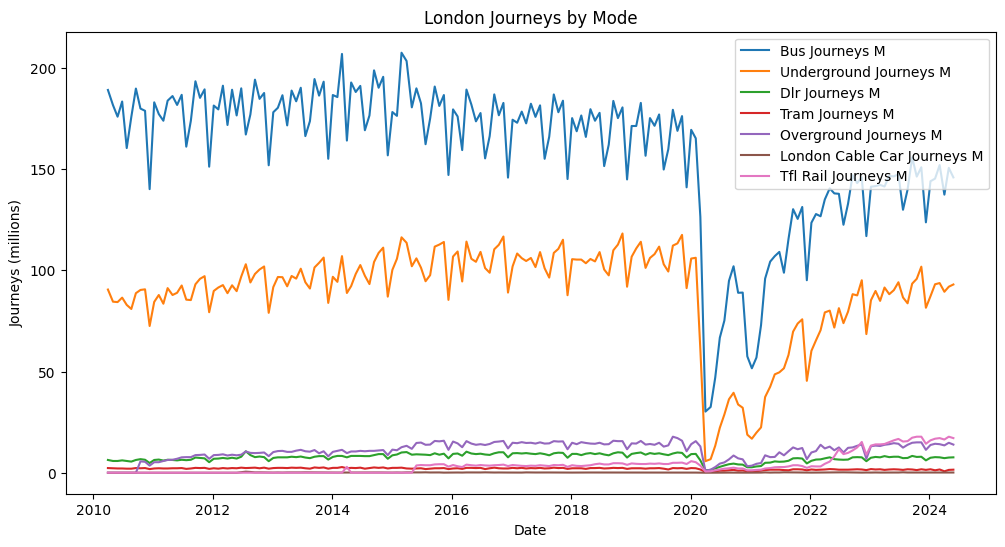

In [ ]:
#Trend visualisations across all transport modes
plt.figure(figsize=(12,6))
for col in ['bus_journeys_m', 'underground_journeys_m', 'dlr_journeys_m',
            'tram_journeys_m', 'overground_journeys_m',
            'london_cable_car_journeys_m', 'tfl_rail_journeys_m']:
    plt.plot(df['period_beginning'], df[col], label=col.replace('_', ' ').title())

plt.legend()
plt.title('London Journeys by Mode')
plt.xlabel('Date')
plt.ylabel('Journeys (millions)')
plt.show()

In [ ]:
#df.loc[df['bus_journeys_m'].idxmax()]

peak_bus = df.loc[df['bus_journeys_m'].idxmax()]
print("Peak bus journeys:", peak_bus)

Peak bus journeys: period_and_financial_year                 13_14/15
reporting_period                                13
days_in_period                                  31
period_beginning               2015-03-01 00:00:00
period_ending                  2015-03-31 00:00:00
bus_journeys_m                               207.5
underground_journeys_m                       116.3
dlr_journeys_m                                10.0
tram_journeys_m                                2.5
overground_journeys_m                         12.6
london_cable_car_journeys_m                   0.07
tfl_rail_journeys_m                            0.0
Name: 64, dtype: object


3. TREND ANALYSIS

In [ ]:
#Create directory for plots
os.makedirs("plots", exist_ok=True)

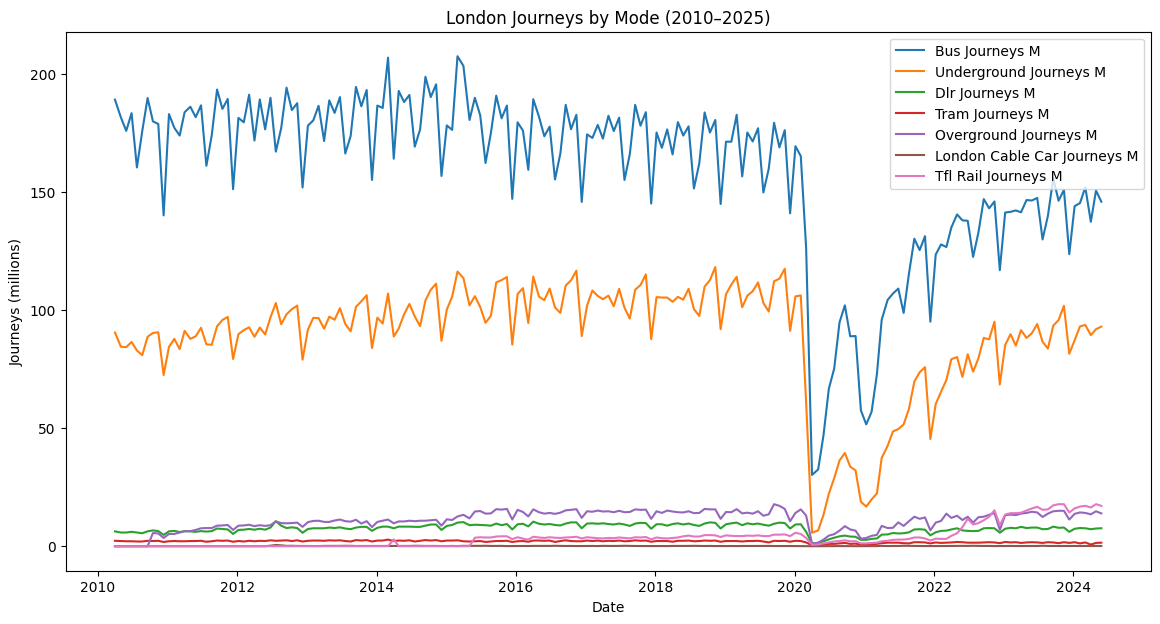

In [ ]:
plt.figure(figsize=(14,7))

for col in ['bus_journeys_m', 'underground_journeys_m', 'dlr_journeys_m',
            'tram_journeys_m', 'overground_journeys_m',
            'london_cable_car_journeys_m', 'tfl_rail_journeys_m']:
    plt.plot(df['period_beginning'], df[col], label=col.replace('_', ' ').title())

plt.legend()
plt.title('London Journeys by Mode (2010–2025)')
plt.xlabel('Date')
plt.ylabel('Journeys (millions)')
plt.savefig('plots/trends.png',  dpi=300, bbox_inches="tight")
plt.show()


Insight: Insight: Most modes show gradual trends with a strong decline around 2020 due to COVID-19.
Bus and Underground dominate in volume; London Cable Car journeys are minimal and seasonal.

4. MODE COMPARISON: BUS vs UNDERGROUND

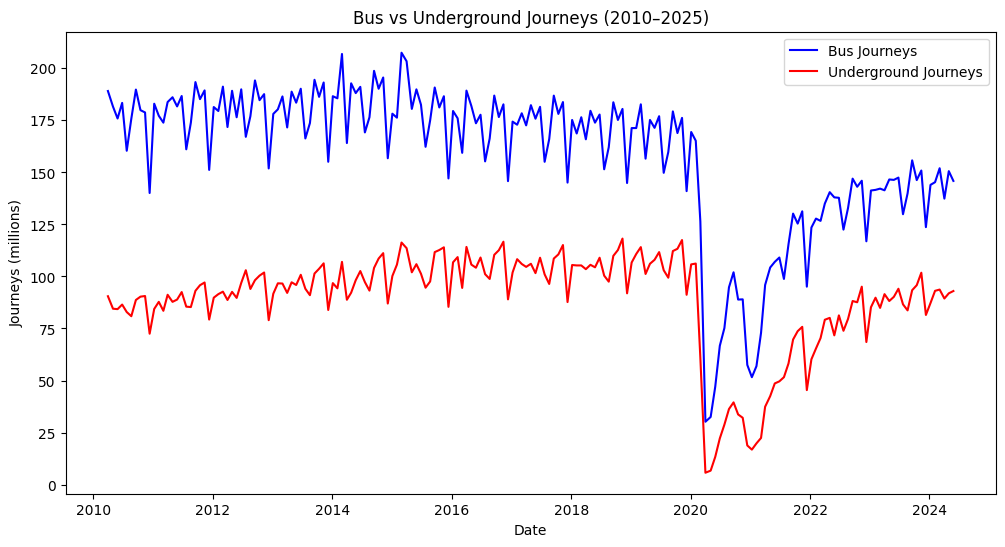

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['period_beginning'], df['bus_journeys_m'], label='Bus Journeys', color='blue')
plt.plot(df['period_beginning'], df['underground_journeys_m'], label='Underground Journeys', color='red')

plt.legend()
plt.title('Bus vs Underground Journeys (2010–2025)')
plt.xlabel('Date')
plt.ylabel('Journeys (millions)')
plt.savefig('plots/bus_vs_underground.png', dpi=300, bbox_inches="tight" )
plt.show()

Insight: Insight: Both modes experienced a sharp decline in 2020, but buses recover more quickly, suggesting greater resilience post-pandemic.

5. SEASONALITY ANALYSIS: AVERAGE BY MONTH

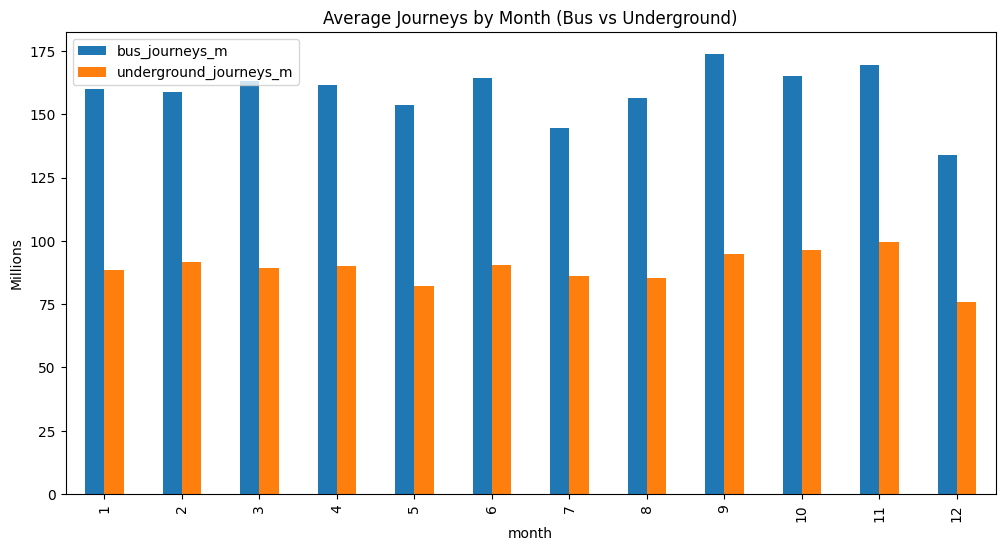

In [ ]:
df['month'] = df['period_beginning'].dt.month
monthly_avg = df.groupby('month')[['bus_journeys_m','underground_journeys_m']].mean()

#Bar plot for monthly average journeys
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Journeys by Month (Bus vs Underground)')
plt.ylabel('Millions')
plt.savefig('plots/seasonality.png', dpi=300, bbox_inches="tight")
plt.show()

Insight: Bus journeys consistently exceed Underground journeys. Dips occur in July and December; peaks in spring and autumn months.

 6. EVENT IMPACT ANALYSIS: 2012 OLYMPICS vs COVID-19

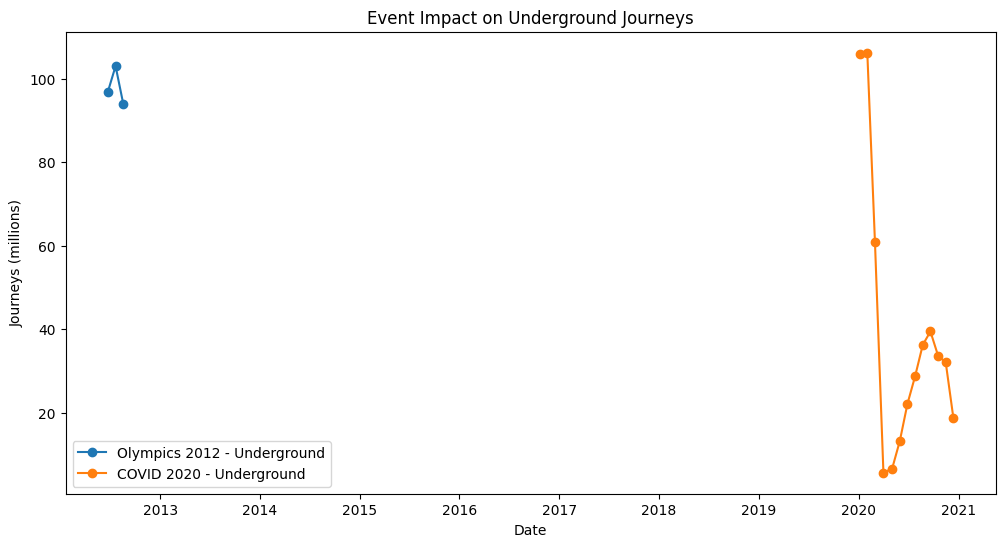

In [ ]:
# Filter data for Olympics and COVID
olympics_period = df[(df['period_beginning'] >= '2012-06-01') & (df['period_beginning'] <= '2012-09-01')]
covid_period = df[(df['period_beginning'] >= '2020-01-01') & (df['period_beginning'] <= '2020-12-31')]

plt.figure(figsize=(12,6))
plt.plot(olympics_period['period_beginning'], olympics_period['underground_journeys_m'], marker='o', label='Olympics 2012 - Underground')
plt.plot(covid_period['period_beginning'], covid_period['underground_journeys_m'], marker='o', label='COVID 2020 - Underground')

plt.legend()
plt.title('Event Impact on Underground Journeys')
plt.xlabel('Date')
plt.ylabel('Journeys (millions)')
plt.savefig('plots/event_impact.png', dpi=300, bbox_inches="tight")
plt.show()

Insight: The 2012 Olympics boosted Underground journeys temporarily, while COVID-19 caused an unprecedented collapse in usage.

In [ ]:
import shutil

# Zip the entire plots folder
shutil.make_archive("plots", 'zip', "plots")


from google.colab import files

files.download("plots.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>